In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp


In [2]:
DNA_SIZE = 2  # parameter (solution) number
N_POP = 20  # population size
N_GENERATION = 100  # training step
LR = 0.02  # learning rate


In [26]:
def get_fitness(pred): return -((pred[:, 0]) ** 2 + pred[:, 1] ** 2)


mean = tf.Variable(tf.random.normal([2, ], 13., 1.), dtype=tf.float32, trainable=True, name='mean')
cov = tf.Variable(5. * tf.eye(DNA_SIZE), dtype=tf.float32, trainable=True, name='cov')

mvn = tfp.distributions.MultivariateNormalFullCovariance(loc=mean, covariance_matrix=cov)

tfkids = tf.keras.Input(shape=[N_POP, DNA_SIZE])

tfkids_fit = tf.keras.Input(shape=[N_POP, ])


In [4]:
mvn.variables

(<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
 array([[5., 0.],
        [0., 5.]], dtype=float32)>,
 <tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([12.919497, 14.029813], dtype=float32)>)

In [5]:
optimizer = tf.keras.optimizers.SGD(LR)


In [6]:
def FocalLoss():
    def custom_loss(tfkids, tfkids_fit):
        loss = -tf.reduce_mean(mvn.log_prob(tfkids) * tfkids_fit)
        return loss

    return custom_loss

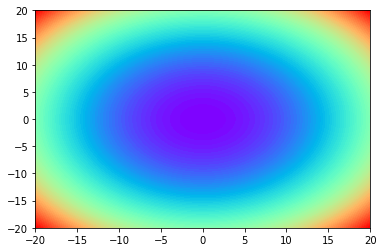

In [7]:
n = 300
x = np.linspace(-20, 20, n)
X, Y = np.meshgrid(x, x)
Z = np.zeros_like(X)
for i in range(n):
    for j in range(n):
        Z[i, j] = get_fitness(np.array([[x[i], x[j]]]))
plt.contourf(X, Y, -Z, 100, cmap=plt.cm.rainbow);
plt.ylim(-20, 20);
plt.xlim(-20, 20);
plt.ion()

loss_object = FocalLoss()

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([11.998887, 13.960734], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[5., 0.],
       [0., 5.]], dtype=float32)>


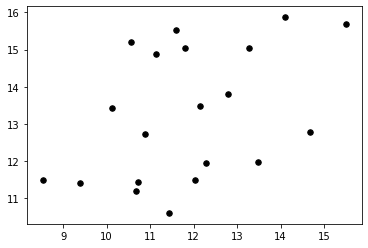

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([13.933186, 16.11377 ], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[ 5.6654096 , -0.01099228],
       [-0.01099228,  5.5241866 ]], dtype=float32)>


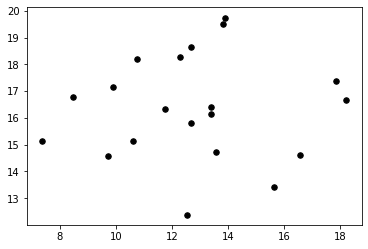

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([16.288847, 19.189583], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[ 6.2998614, -0.3886973],
       [-0.3886973,  6.4442987]], dtype=float32)>


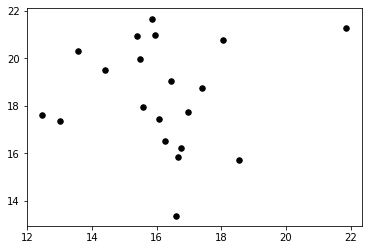

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([19.173565, 22.436136], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[ 7.3421936 , -0.32959807],
       [-0.32959807,  7.254535  ]], dtype=float32)>


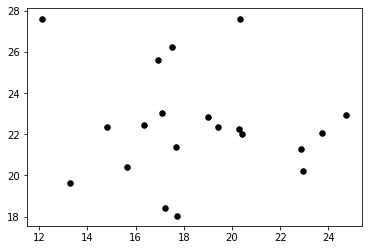

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([22.859327, 27.008293], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[ 8.448376  , -0.58863574],
       [-0.58863574,  8.597794  ]], dtype=float32)>


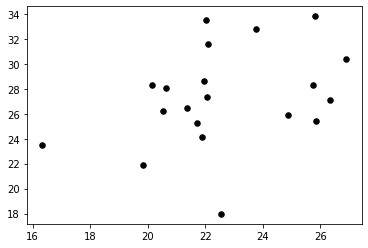

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([27.624393, 32.74981 ], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[ 9.981472  , -0.50432885],
       [-0.50432885, 10.393332  ]], dtype=float32)>


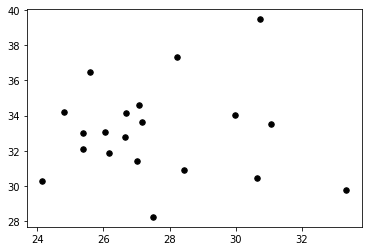

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([32.925465, 39.076157], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[11.96303   , -0.34838545],
       [-0.34838545, 12.397551  ]], dtype=float32)>


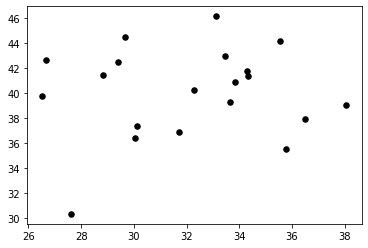

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([39.737595, 47.619812], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[13.9516535, -0.6590041],
       [-0.6590041, 14.940752 ]], dtype=float32)>


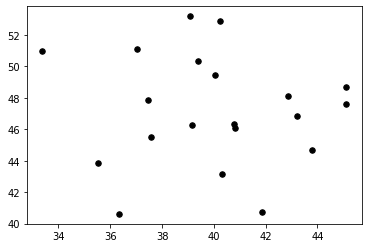

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([48.12314, 57.52784], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[16.836792 , -0.4953217],
       [-0.4953217, 17.450232 ]], dtype=float32)>


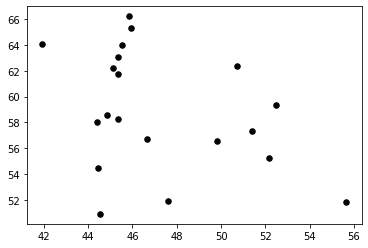

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([58.860268, 70.94776 ], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[20.042353  , -0.77315223],
       [-0.77315223, 21.46116   ]], dtype=float32)>


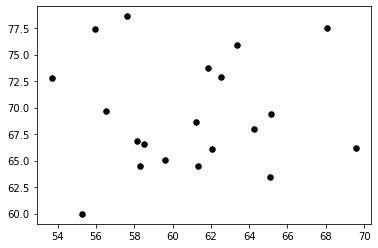

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([73.72452, 87.78102], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[25.338554 ,  0.3475504],
       [ 0.3475504, 25.006193 ]], dtype=float32)>


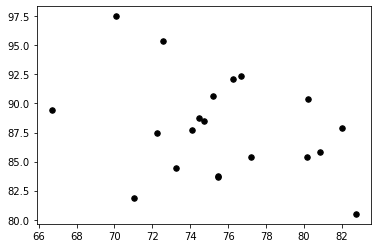

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([ 91.32899, 108.24287], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[31.413595 ,  1.0307496],
       [ 1.0307496, 30.558208 ]], dtype=float32)>


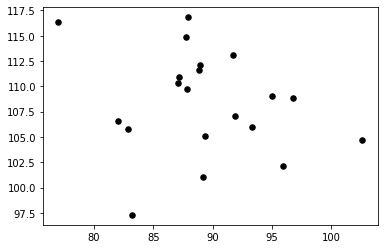

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([113.569214, 135.3746  ], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[37.052116 , -0.2714281],
       [-0.2714281, 37.291782 ]], dtype=float32)>


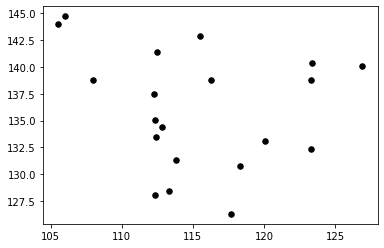

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([142.80249, 169.84802], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[46.561756  ,  0.69217134],
       [ 0.69217134, 46.350143  ]], dtype=float32)>


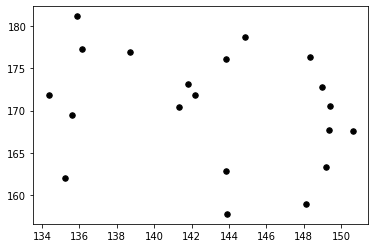

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([179.68839, 213.76183], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[57.37158   ,  0.59580964],
       [ 0.59580964, 57.361748  ]], dtype=float32)>


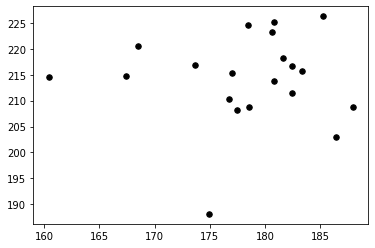

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([228.89279, 272.83444], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[70.22153  , -0.5412665],
       [-0.5412665, 70.97135  ]], dtype=float32)>


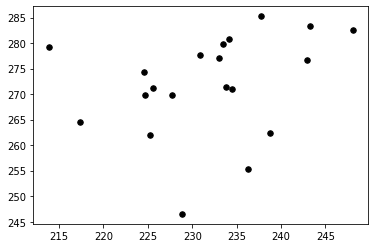

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([296.80698, 352.26443], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[90.160515 ,  1.4690647],
       [ 1.4690647, 88.476494 ]], dtype=float32)>


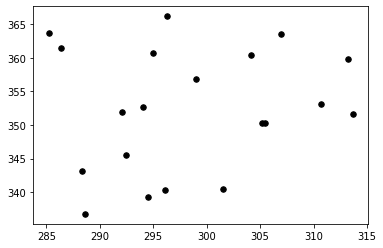

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([382.72314, 453.6933 ], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[114.77199  ,   2.0706856],
       [  2.0706856, 112.82572  ]], dtype=float32)>


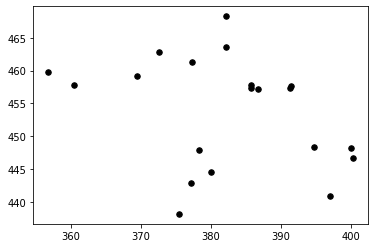

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([496.82373, 589.3148 ], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[145.22562  ,   0.9062302],
       [  0.9062302, 144.22946  ]], dtype=float32)>


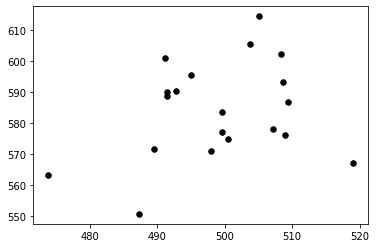

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([658.06726, 777.67645], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[187.03702  ,   1.9399287],
       [  1.9399287, 181.04727  ]], dtype=float32)>


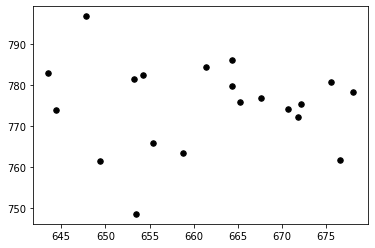

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([ 861.9761, 1016.5033], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[244.45425  ,   3.4915304],
       [  3.4915304, 236.50333  ]], dtype=float32)>


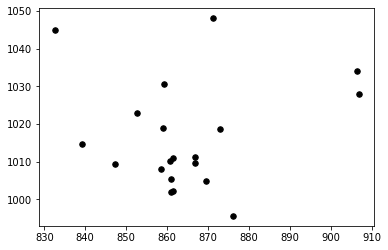

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([1151.7249, 1357.0985], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[319.97607  ,   5.2607703],
       [  5.2607703, 313.04446  ]], dtype=float32)>


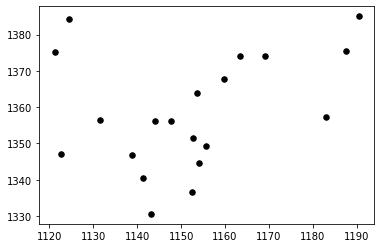

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([1546.7288, 1823.1328], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[419.82352 ,   4.113949],
       [  4.113949, 416.4642  ]], dtype=float32)>


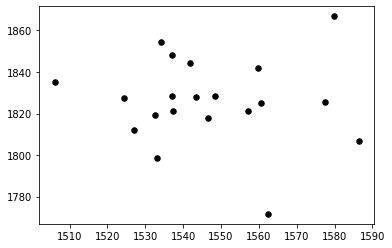

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([2093.398 , 2468.1663], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[556.9349   ,   3.3207564],
       [  3.3207564, 556.3742   ]], dtype=float32)>


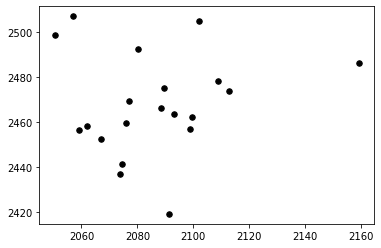

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([2858.1633, 3372.8887], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[740.0226   ,  -3.3248367],
       [ -3.3248367, 744.5      ]], dtype=float32)>


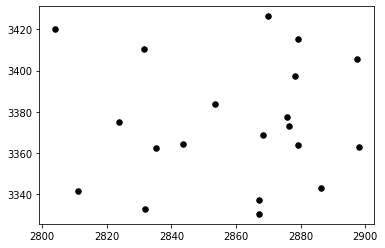

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([3946.2236, 4657.9663], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[1004.4783   ,   -2.2658315],
       [  -2.2658315, 1009.7742   ]], dtype=float32)>


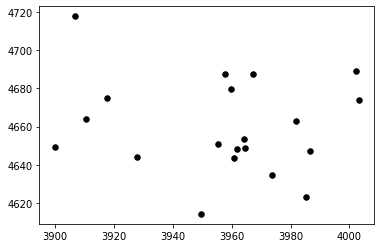

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([5455.597 , 6435.7246], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[1384.7506  ,    8.008234],
       [   8.008234, 1382.2363  ]], dtype=float32)>


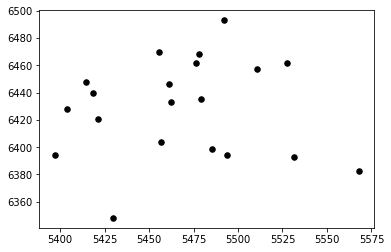

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([7713.5176, 9087.968 ], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[1912.0859 ,   19.94028],
       [  19.94028, 1888.9617 ]], dtype=float32)>


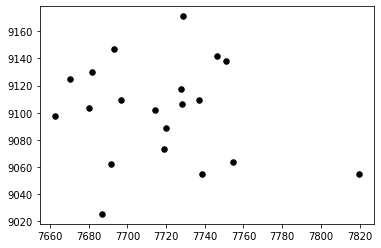

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([10835.855, 12769.551], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[2661.2585  ,   16.974327],
       [  16.974327, 2655.935   ]], dtype=float32)>


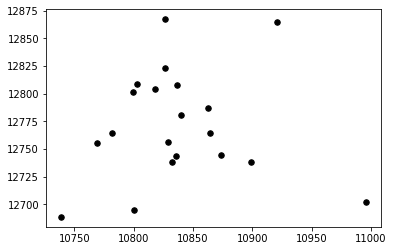

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([15493.18 , 18255.832], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[3720.3062  ,   15.461234],
       [  15.461234, 3713.56    ]], dtype=float32)>


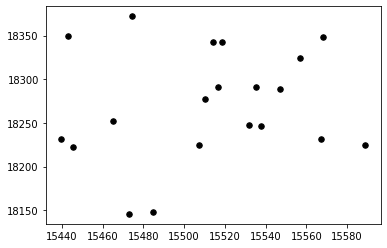

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([22263.82 , 26230.977], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[5280.908   ,   28.506052],
       [  28.506052, 5276.6895  ]], dtype=float32)>


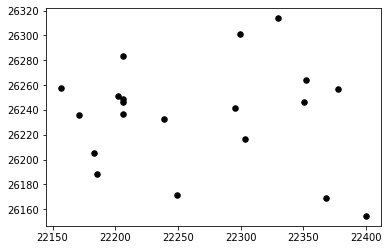

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([32169.926, 37902.973], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[7525.6245  ,   19.048609],
       [  19.048609, 7525.744   ]], dtype=float32)>


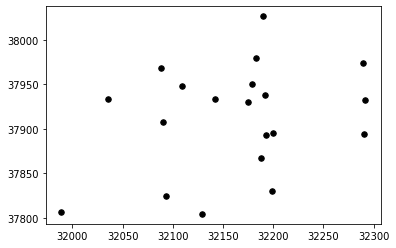

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([46849.934, 55207.832], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[1.0801321e+04, 1.8314362e-01],
       [1.8314362e-01, 1.0819743e+04]], dtype=float32)>


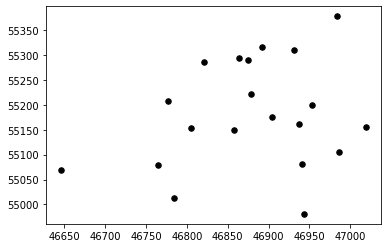

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([69493.19, 81860.2 ], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[15684.398  ,    34.59055],
       [   34.59055, 15628.441  ]], dtype=float32)>


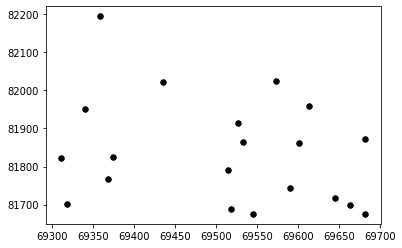

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([104556.07, 123143.81], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[23052.832  ,    38.84476],
       [   38.84476, 22980.19   ]], dtype=float32)>


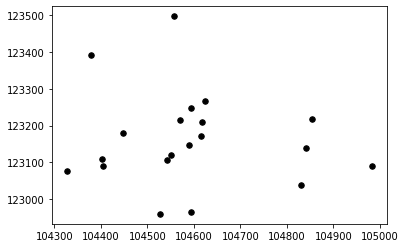

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([158386.  , 186527.34], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[34429.6    ,    79.67711],
       [   79.67711, 34369.23   ]], dtype=float32)>


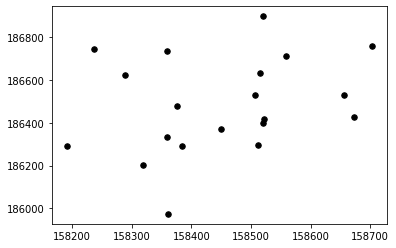

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([243090.98, 286215.03], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[51902.29   ,   133.69589],
       [  133.69589, 51721.133  ]], dtype=float32)>


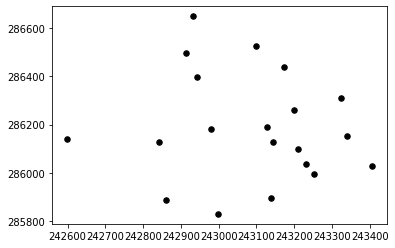

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([374628.66, 441079.47], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[7.9055086e+04, 4.8240746e+01],
       [4.8240746e+01, 7.8942312e+04]], dtype=float32)>


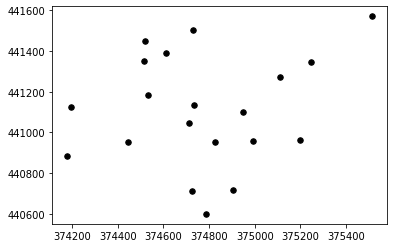

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([590379.3 , 695012.56], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[121657.     ,    283.63474],
       [   283.63474, 121447.69   ]], dtype=float32)>


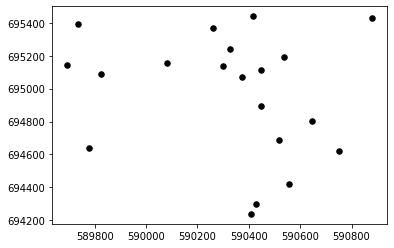

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([ 934175. , 1099754.2], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[1.89910125e+05, 1.53897705e+01],
       [1.53897705e+01, 1.89825141e+05]], dtype=float32)>


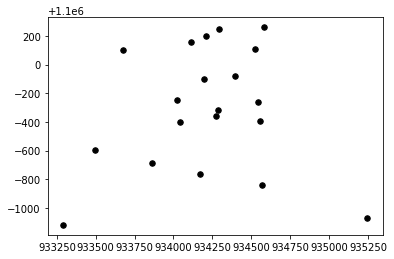

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([1492321. , 1756749.2], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[2.9960969e+05, 8.1822556e+01],
       [8.1822556e+01, 2.9936541e+05]], dtype=float32)>


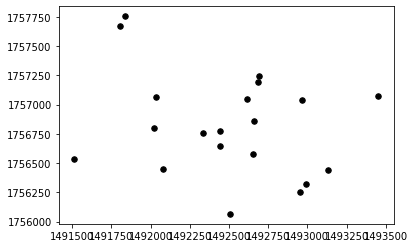

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([2400203.2, 2825430.5], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[4.7723388e+05, 3.4014227e+02],
       [3.4014227e+02, 4.7702697e+05]], dtype=float32)>


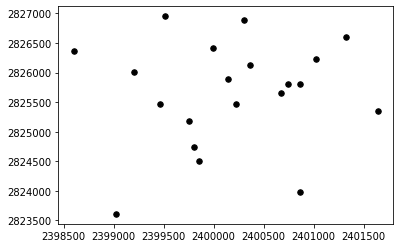

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([3975252., 4679698.], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[7.651688e+05, 3.763321e+01],
       [3.763321e+01, 7.655849e+05]], dtype=float32)>


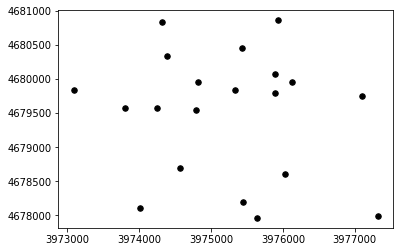

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([6625918., 7799956.], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[ 1.2578118e+06, -5.6309578e+01],
       [-5.6309578e+01,  1.2575494e+06]], dtype=float32)>


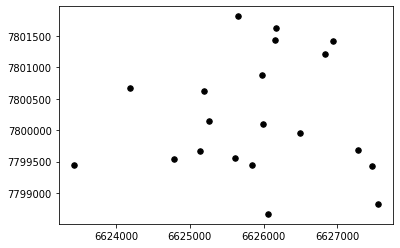

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([11044359., 13001482.], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[ 2.0905350e+06, -6.4733727e+01],
       [-6.4733727e+01,  2.0910098e+06]], dtype=float32)>


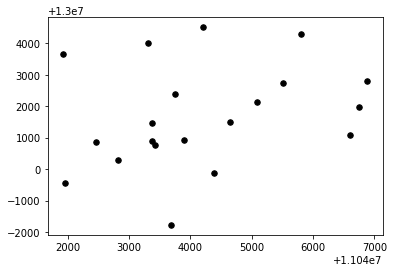

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([18796032., 22127102.], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[ 3.4823028e+06, -3.8496335e+02],
       [-3.8496335e+02,  3.4832855e+06]], dtype=float32)>


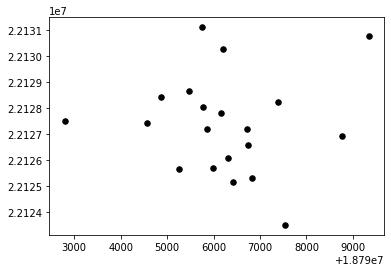

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([32104584., 37794252.], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[5.9033290e+06, 4.0590646e+02],
       [4.0590646e+02, 5.9039020e+06]], dtype=float32)>


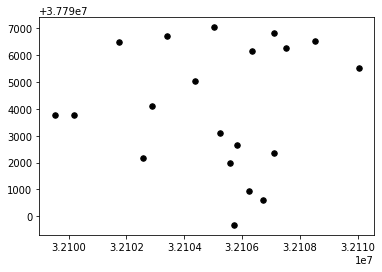

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([55825004., 65717910.], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[1.0070020e+07, 1.3260223e+03],
       [1.3260223e+03, 1.0068774e+07]], dtype=float32)>


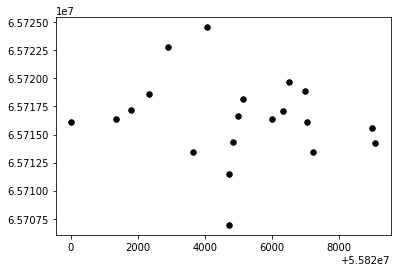

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([9.8342032e+07, 1.1576831e+08], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[1.7453228e+07, 1.6267126e+02],
       [1.6267126e+02, 1.7449000e+07]], dtype=float32)>


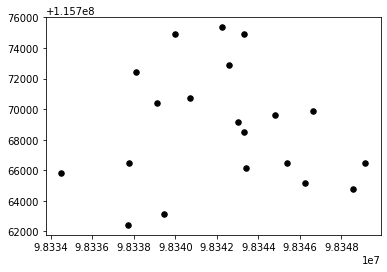

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([1.7444928e+08, 2.0536195e+08], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[3.0674052e+07, 7.0521045e+02],
       [7.0521045e+02, 3.0673674e+07]], dtype=float32)>


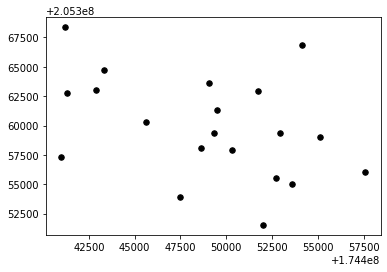

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([3.1285050e+08, 3.6828666e+08], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[ 5.4343204e+07, -6.9528259e+02],
       [-6.9528259e+02,  5.4338188e+07]], dtype=float32)>


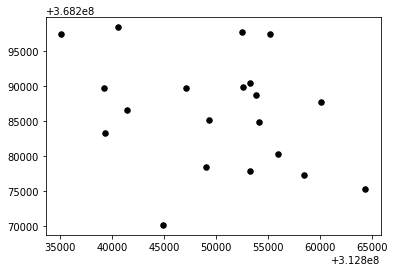

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([5.7255450e+08, 6.7400966e+08], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[ 9.7311360e+07, -1.7173186e+03],
       [-1.7173186e+03,  9.7310680e+07]], dtype=float32)>


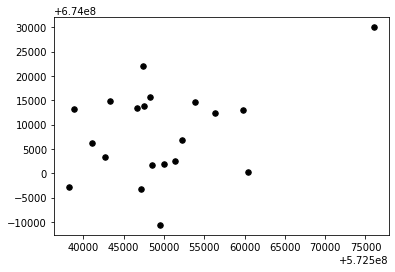

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([1.0571085e+09, 1.2444288e+09], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[ 1.7767136e+08, -1.3227249e+04],
       [-1.3227249e+04,  1.7767894e+08]], dtype=float32)>


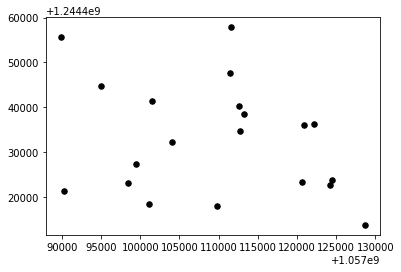

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([1.9736945e+09, 2.3234371e+09], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[3.2773171e+08, 1.1860752e+03],
       [1.1860752e+03, 3.2774294e+08]], dtype=float32)>


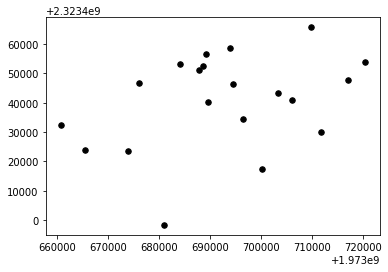

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([3.7298993e+09, 4.3908506e+09], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[ 6.1130707e+08, -6.2335015e+03],
       [-6.2335015e+03,  6.1132570e+08]], dtype=float32)>


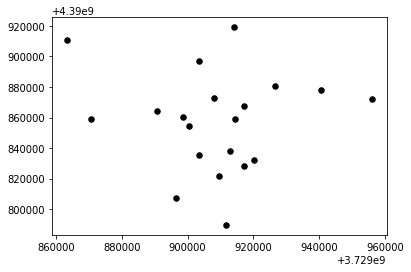

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([7.2149883e+09, 8.4935066e+09], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[1.1542994e+09, 3.1246783e+04],
       [3.1246783e+04, 1.1542996e+09]], dtype=float32)>


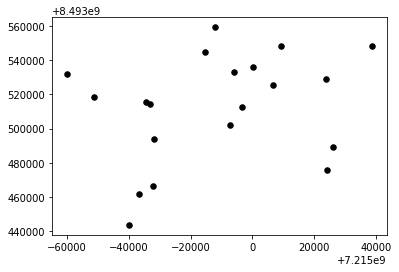

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([1.3985028e+10, 1.6463223e+10], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[2.2302408e+09, 2.0873535e+03],
       [2.0873535e+03, 2.2302607e+09]], dtype=float32)>


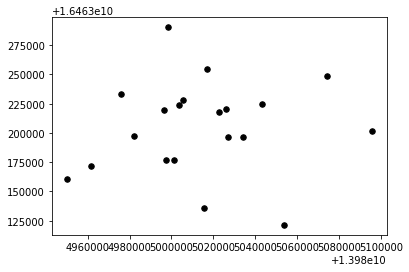

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([2.7464294e+10, 3.2331059e+10], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[ 4.3224279e+09, -5.0245953e+04],
       [-5.0245953e+04,  4.3224054e+09]], dtype=float32)>


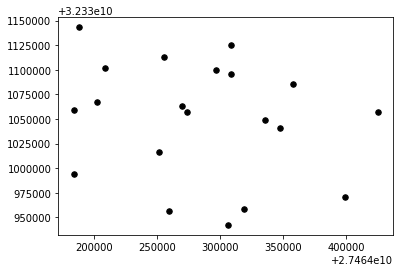

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([5.489011e+10, 6.461683e+10], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[ 8.4857590e+09, -3.9756539e+04],
       [-3.9756539e+04,  8.4857533e+09]], dtype=float32)>


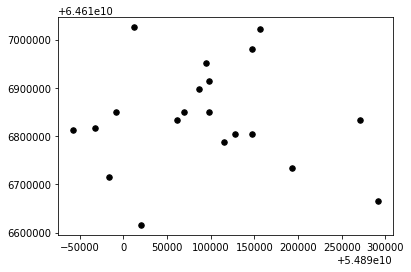

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([1.117037e+11, 1.314980e+11], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[ 1.6956670e+10, -6.6071406e+04],
       [-6.6071406e+04,  1.6956758e+10]], dtype=float32)>


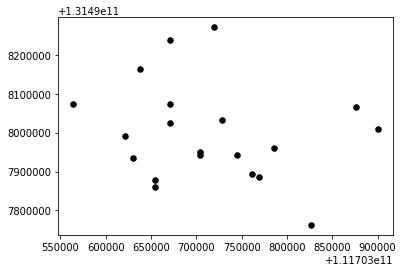

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([2.2807275e+11, 2.6848805e+11], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[3.4512896e+10, 4.9453211e+04],
       [4.9453211e+04, 3.4512843e+10]], dtype=float32)>


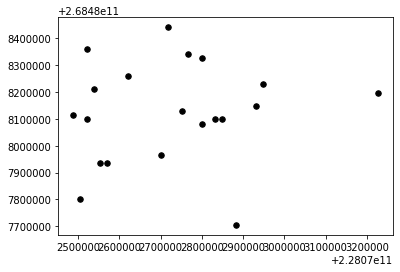

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([4.7604531e+11, 5.6040233e+11], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[ 7.047125e+10, -1.109454e+05],
       [-1.109454e+05,  7.047168e+10]], dtype=float32)>


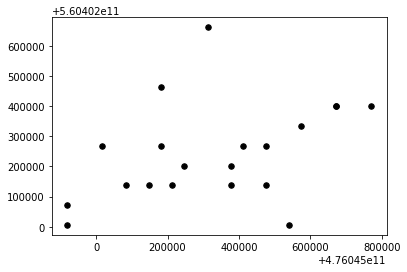

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([9.9928166e+11, 1.1763580e+12], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[1.4719336e+11, 8.7878852e+04],
       [8.7878852e+04, 1.4719289e+11]], dtype=float32)>


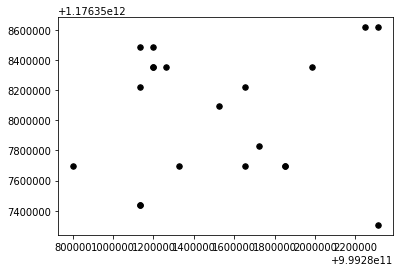

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([2.1514675e+12, 2.5327155e+12], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[ 3.0904674e+11, -5.8954569e+05],
       [-5.8954569e+05,  3.0904766e+11]], dtype=float32)>


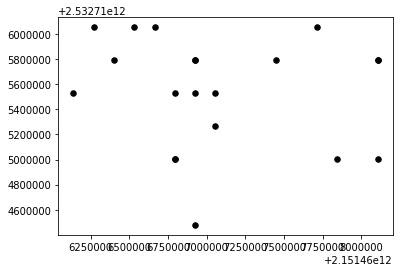

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([4.679910e+12, 5.509208e+12], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[ 6.6638447e+11, -1.8644232e+06],
       [-1.8644232e+06,  6.6638617e+11]], dtype=float32)>


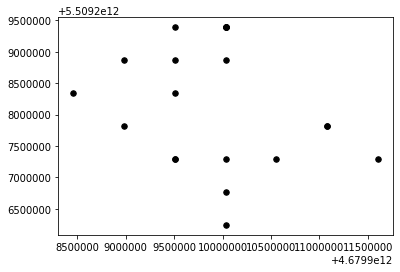

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([1.0354686e+13, 1.2189576e+13], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[1.4505103e+12, 1.1434450e+05],
       [1.1434450e+05, 1.4505120e+12]], dtype=float32)>


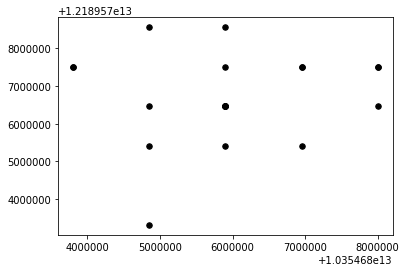

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([2.3087819e+13, 2.7179073e+13], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[3.2140647e+12, 1.3327328e+05],
       [1.3327328e+05, 3.2140653e+12]], dtype=float32)>


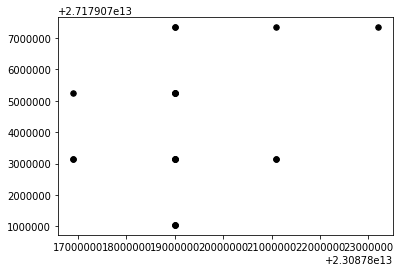

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([5.2373171e+13, 6.1653903e+13], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[7.1708925e+12, 2.0068980e+06],
       [2.0068980e+06, 7.1708956e+12]], dtype=float32)>


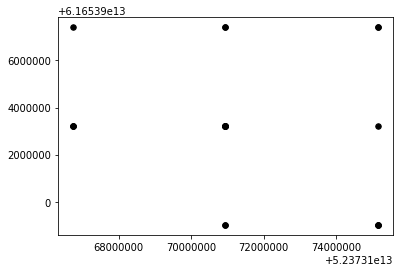

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([1.2024537e+14, 1.4155331e+14], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[1.62968895e+13, 1.01143475e+06],
       [1.01143475e+06, 1.62968843e+13]], dtype=float32)>


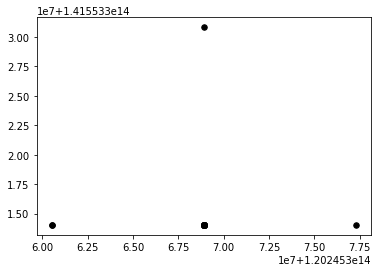

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([2.8143136e+14, 3.3130210e+14], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[ 3.746429e+13, -8.991088e+06],
       [-8.991088e+06,  3.746430e+13]], dtype=float32)>


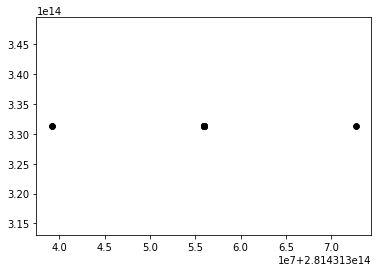

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([6.6696795e+14, 7.8515733e+14], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[ 8.7902898e+13, -3.1774355e+06],
       [-3.1774355e+06,  8.7902915e+13]], dtype=float32)>


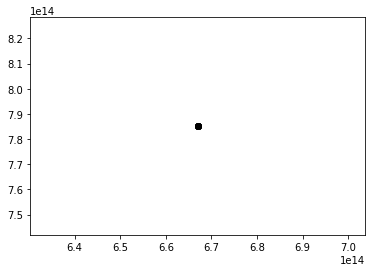

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([1.5895781e+15, 1.8712577e+15], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[2.0864045e+14, 2.8221380e+06],
       [2.8221380e+06, 2.0864049e+14]], dtype=float32)>


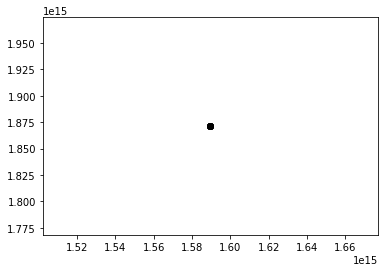

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([3.8825763e+15, 4.5705839e+15], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[ 4.9757599e+14, -1.1283946e+07],
       [-1.1283946e+07,  4.9757592e+14]], dtype=float32)>


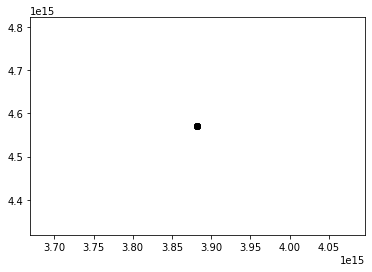

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([9.5241845e+15, 1.1211907e+16], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[1.2203728e+15, 7.9317060e+06],
       [7.9317060e+06, 1.2203728e+15]], dtype=float32)>


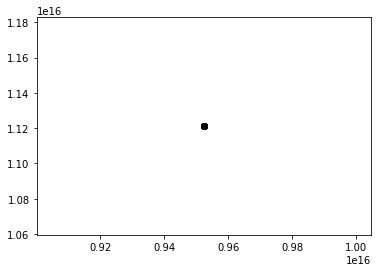

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([2.403853e+16, 2.829825e+16], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[2.9937404e+15, 8.5608144e+07],
       [8.5608144e+07, 2.9937398e+15]], dtype=float32)>


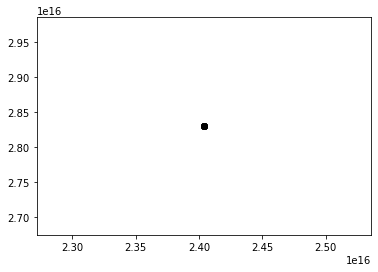

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([6.0763643e+16, 7.1531194e+16], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[ 7.598822e+15, -5.655648e+06],
       [-5.655648e+06,  7.598822e+15]], dtype=float32)>


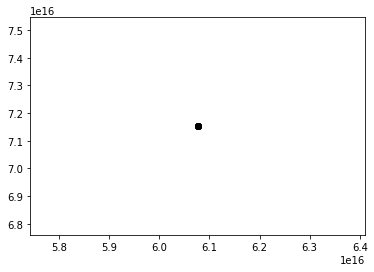

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([1.5597723e+17, 1.8361700e+17], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[ 1.9191316e+16, -6.4760132e+07],
       [-6.4760132e+07,  1.9191316e+16]], dtype=float32)>


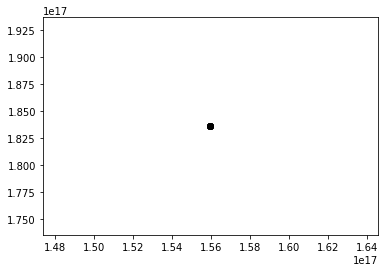

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([4.0850709e+17, 4.8089608e+17], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[4.9436302e+16, 4.5915676e+07],
       [4.5915676e+07, 4.9436302e+16]], dtype=float32)>


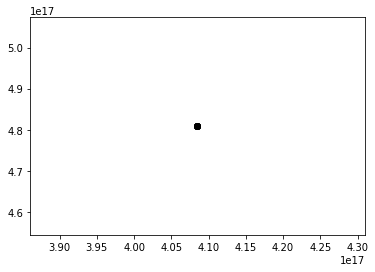

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([1.0770764e+18, 1.2679384e+18], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[ 1.2997208e+17, -5.5087987e+08],
       [-5.5087987e+08,  1.2997208e+17]], dtype=float32)>


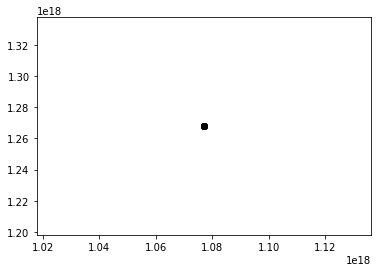

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([2.8940026e+18, 3.4068307e+18], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[3.4292252e+17, 4.7120237e+08],
       [4.7120237e+08, 3.4292252e+17]], dtype=float32)>


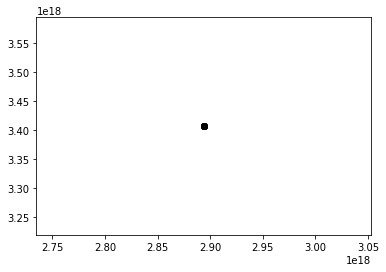

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([7.840156e+18, 9.229461e+18], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[ 9.2561246e+17, -1.6873298e+09],
       [-1.6873298e+09,  9.2561246e+17]], dtype=float32)>


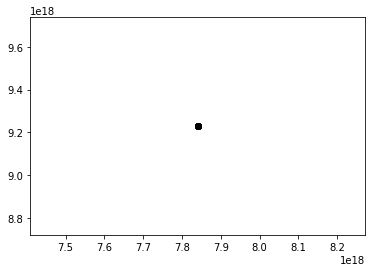

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([2.1596605e+19, 2.5423603e+19], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[2.5099800e+18, 1.7438559e+09],
       [1.7438559e+09, 2.5099800e+18]], dtype=float32)>


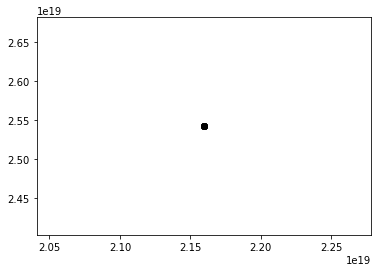

<tf.Variable 'mean:0' shape=(2,) dtype=float32, numpy=array([6.0488110e+19, 7.1206823e+19], dtype=float32)>
<tf.Variable 'cov:0' shape=(2, 2) dtype=float32, numpy=
array([[nan, nan],
       [nan, nan]], dtype=float32)>


InvalidArgumentError: Input matrix is not invertible. [Op:MatrixTriangularSolve]

In [27]:
# training
for g in range(N_GENERATION):
    with tf.GradientTape() as tape:
        mvn = tfp.distributions.MultivariateNormalFullCovariance(loc=mean, covariance_matrix=cov)
        kids = mvn.sample(N_POP)
        kids_fit = get_fitness(kids)
        print(mean)
        print(cov)
        loss = loss_object(kids,kids_fit)
    gradients = tape.gradient(target=loss, sources=mvn.variables)
    optimizer.apply_gradients(zip(gradients, mvn.variables))
    # plotting update
    if 'sca' in globals(): sca.remove()
    sca = plt.scatter(kids[:, 0], kids[:, 1], s=30, c='k');
    plt.pause(0.01)

print('Finished');
plt.ioff();
plt.show()
# training